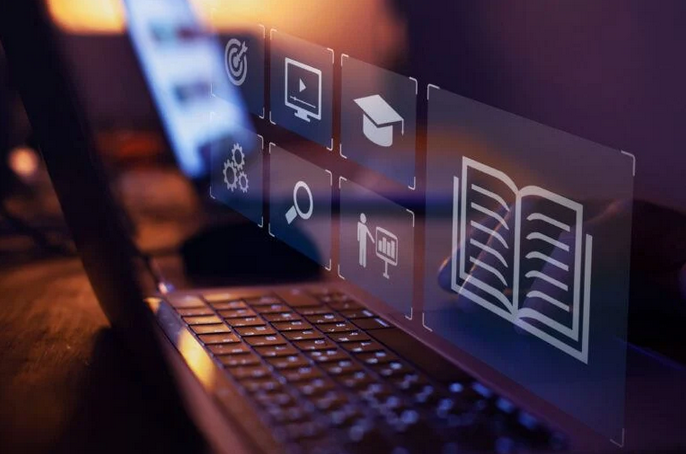

## Проект e-learning: вариант 2
Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (5 баллов)

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (5 баллов) 

4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3). (8 баллов)

5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. (10 баллов) 

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов. (35 баллов)

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

###  Файлы: 

### ```assessments.csv``` 

- этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

### ```courses.csv``` 
- файл содержит список предметов по семестрам.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

### ```studentAssessment.csv``` 
- этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

### ```studentRegistration.csv``` 
- этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import time

%matplotlib inline

***Загрузим данные и посмотрим на них "глазками"***

## Оценки в тесте

In [10]:
assessments = pd.read_csv('assessments.csv')
assessments.head()

# code_module — идентификационный код предмета.

# code_presentation — семестр (Идентификационный код).

# id_assessment — тест (Идентификационный номер ассессмента).

# assessment_type — тип теста. 3 типа: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

# date — информация об окончательной дате сдачи теста (к количество дней с момента начала семестра)

# weight — вес теста в % в оценке за курс

code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0

In [11]:
assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [12]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

#### Есть подозрение, что в данных где date == NaN, имеется ввиду что дата сдачи не ограничена, поэтому мы можем ее заменить на какое то большое число или например на величину длительности семестра, чтоб с данными в будущем было проще работать (сравнивать и тд)

Сделаем это после считывания данных о самих курсах

In [13]:
assessments[assessments.date.isna()]

code_module code_presentation  id_assessment assessment_type  date  weight
5           AAA             2013J           1757            Exam   NaN   100.0
11          AAA             2014J           1763            Exam   NaN   100.0
23          BBB             2013B          14990            Exam   NaN   100.0
35          BBB             2013J          15002            Exam   NaN   100.0
47          BBB             2014B          15014            Exam   NaN   100.0
53          BBB             2014J          15025            Exam   NaN   100.0
62          CCC             2014B          24290            Exam   NaN   100.0
63          CCC             2014B          40087            Exam   NaN   100.0
72          CCC             2014J          24299            Exam   NaN   100.0
73          CCC             2014J          40088            Exam   NaN   100.0
108         DDD             2014J          25368            Exam   NaN   100.0

In [14]:
assessments.describe()

id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000

In [15]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

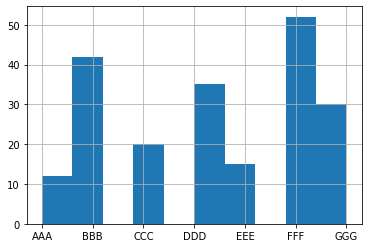

In [16]:
assessments.code_module.hist()

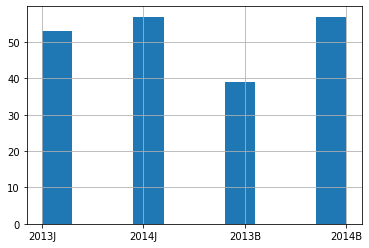

In [17]:
assessments.code_presentation.hist()

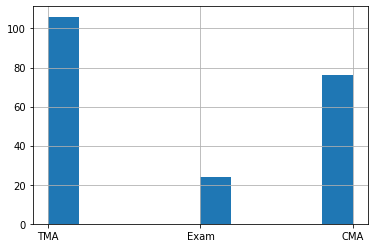

In [18]:
assessments.assessment_type.hist()

***Попробуем понять смысл weight*** <a name="abcd"></a>

In [19]:
assessments.query('assessment_type != "Exam"') \
    .groupby(['code_presentation', 'code_module']) \
    .agg({'weight': 'sum'}) \
    .rename({'weight': 'weight_sum'}, axis=1) #не будем использовать as_index=False в группировке для наглядности вывода

weight_sum
code_presentation code_module            
2013B             BBB               100.0
                  DDD               100.0
                  FFF               100.0
2013J             AAA               100.0
                  BBB               100.0
                  DDD               100.0
                  EEE               100.0
                  FFF               100.0
                  GGG                 0.0
2014B             BBB               100.0
                  CCC               100.0
                  DDD               100.0
                  EEE               100.0
                  FFF               100.0
                  GGG                 0.0
2014J             AAA               100.0
                  BBB               100.0
                  CCC               100.0
                  DDD               100.0
                  EEE               100.0
                  FFF               100.0
                  GGG                 0.0

***Получается в каждом семестре для каждого предмета итоговая сумма  weight  теста с оценкой преподавателя TMA и компьютерной оценки CMA  равна 100%, и получается предмет GGG оценивается только экзаменом***

## Список предметов и их длительность

In [20]:
courses = pd.read_csv('courses.csv')
courses.head(7)

# code_module — предмет (идентификационный код).

# code_presentation — семестр (идентификационный код).

# module_presentation_length — продолжительность семестра в днях.

code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240
5         BBB             2014B                         234
6         CCC             2014J                         269

### Отредактируем данные о тестах, добавив дату сдачи, где нет даты сдачи
В качестве даты сдачи примем длительность курса для отсутствующих занчений даты сдачи

In [21]:
assessments_new = assessments[assessments.date.isna()].merge(courses, on=['code_module', 'code_presentation'])

In [22]:
assessments_new.date = assessments_new.module_presentation_length.apply(lambda x: x)

In [23]:
assessments_new = assessments_new[['code_module', 
                                   'code_presentation', 
                                   'id_assessment', 
                                   'assessment_type', 
                                   'date', 
                                   'weight']]
# с drop что-то пошло не так

In [24]:
assessments_new

code_module code_presentation  id_assessment assessment_type  date  weight
0          AAA             2013J           1757            Exam   268   100.0
1          AAA             2014J           1763            Exam   269   100.0
2          BBB             2013B          14990            Exam   240   100.0
3          BBB             2013J          15002            Exam   268   100.0
4          BBB             2014B          15014            Exam   234   100.0
5          BBB             2014J          15025            Exam   262   100.0
6          CCC             2014B          24290            Exam   241   100.0
7          CCC             2014B          40087            Exam   241   100.0
8          CCC             2014J          24299            Exam   269   100.0
9          CCC             2014J          40088            Exam   269   100.0
10         DDD             2014J          25368            Exam   262   100.0

### Теперь можно отредактировать данные ```assessments```

In [25]:
assessments = assessments.query('date != "NaN"')
# удалили все строки с NaN

In [26]:
assessments = pd.concat([assessments, assessments_new])

***Делаем проверку себя, должно быть 206 записей как в исходном датафрейме***

In [27]:
assessments.shape

(206, 6)

### Дальше исследуем данные courses

In [28]:
courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

***Посмотрим на распределение длительности семестра***

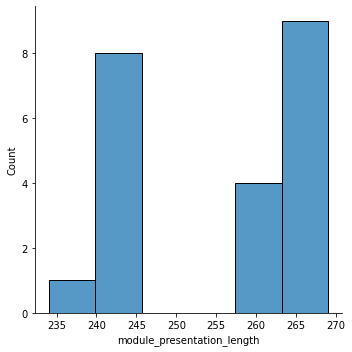

In [29]:
sns.displot(courses.module_presentation_length)

***Посмотрим продолжительность курсов***

In [30]:
courses_df = courses.groupby(['code_presentation','code_module']).agg({'module_presentation_length': 'mean'})
courses_df.head(7)

module_presentation_length
code_presentation code_module                            
2013B             BBB                                 240
                  DDD                                 240
                  FFF                                 240
2013J             AAA                                 268
                  BBB                                 268
                  DDD                                 261
                  EEE                                 268

In [31]:
courses_df['length_by_month'] = round(courses_df.module_presentation_length / 30, 0)

In [32]:
courses_df.head(20)

module_presentation_length  length_by_month
code_presentation code_module                                             
2013B             BBB                                 240              8.0
                  DDD                                 240              8.0
                  FFF                                 240              8.0
2013J             AAA                                 268              9.0
                  BBB                                 268              9.0
                  DDD                                 261              9.0
                  EEE                                 268              9.0
                  FFF                                 268              9.0
                  GGG                                 261              9.0
2014B             BBB                                 234              8.0
                  CCC                                 241              8.0
                  DDD                                 241              8.0
                  EEE                                 241              8.0
                  FFF                                 241              8.0
                  GGG                                 241              8.0
2014J             AAA                                 269              9.0
                  BBB                                 262              9.0
                  CCC                                 269              9.0
                  DDD                                 262              9.0
                  EEE                                 269              9.0

***Курсы длятся 8 - 9 месяцев, что довольно странно***

## Результаты студентов

In [33]:
studentAssessment = pd.read_csv('studentAssessment.csv')
studentAssessment.head(7)

# id_assessment — тест (идентификационный номер).

# id_student — идентификационный номер студента.

# date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

# is_banked — факт перезачета теста с прошлого семестра

# score — оценка учащегося в этом тесте. от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0
5           1752       45462              20          0   70.0
6           1752       45642              18          0   72.0

In [34]:
studentAssessment.shape

(173912, 5)

In [35]:
studentAssessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [36]:
studentAssessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

***Не все 206 типов тестов сдавались студентами***

***Посмотрим на распределение оценок***

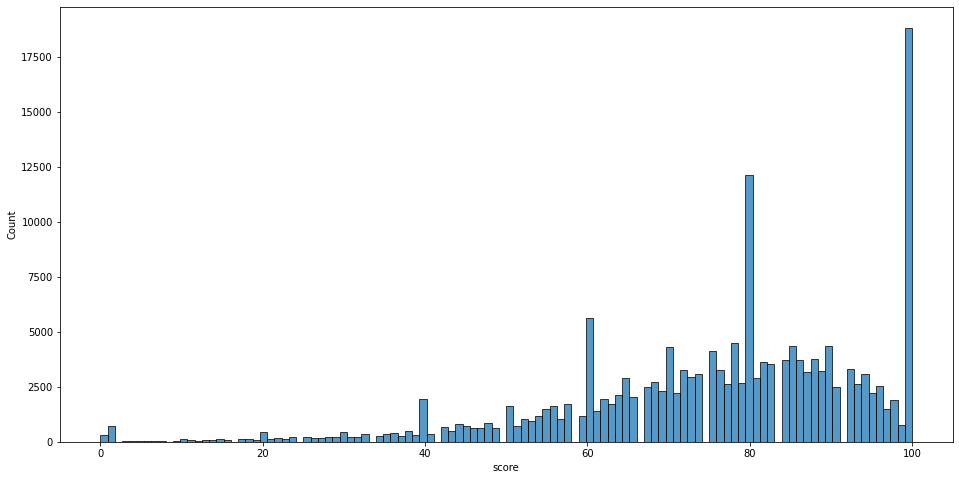

In [37]:

plt.figure(figsize=(16, 8))
sns.histplot(studentAssessment.score)

***Выглядит странным большое количество оценок 40/60/80/100***

Попробуем исключить оценку компьютера и посмотреть на распределение score

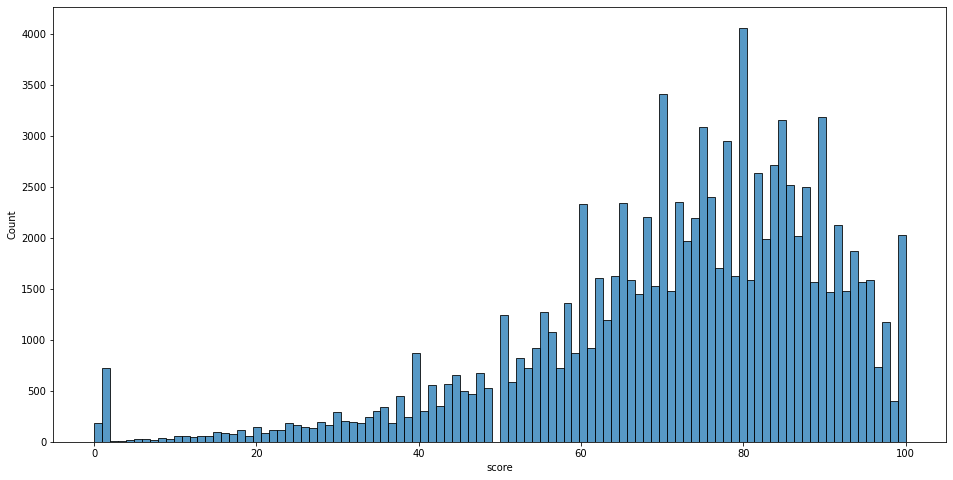

In [38]:
studentAssessment_w_TMA = studentAssessment.merge(assessments, on='id_assessment').query('assessment_type != "CMA"')
plt.figure(figsize=(16, 8))
sns.histplot(studentAssessment_w_TMA.score)

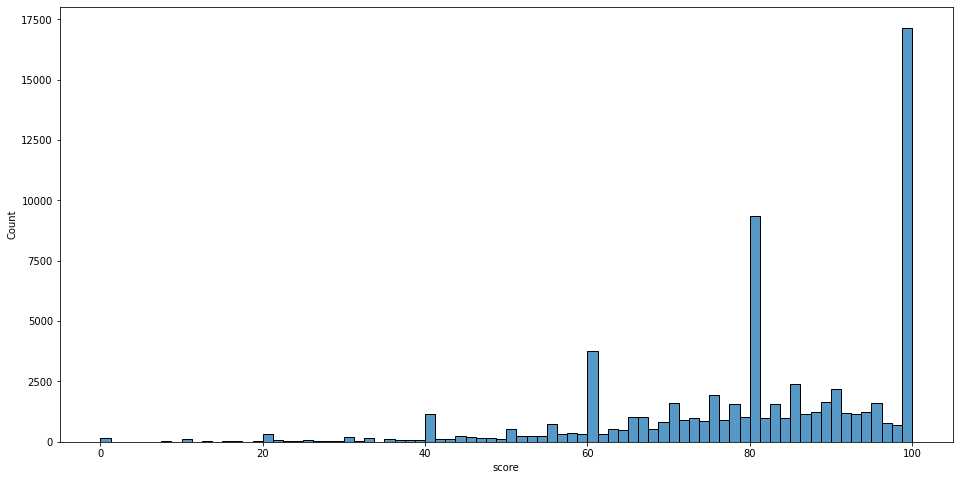

In [39]:
studentAssessment_w_TMA = studentAssessment.merge(assessments, on='id_assessment').query('assessment_type == "CMA"')
plt.figure(figsize=(16, 8))
sns.histplot(studentAssessment_w_TMA.score)

***Действительно CMA часто ставит оценки 40/60/80/100***

In [40]:
studentAssessment.score.describe()

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

## Данные регистрации студентов

In [41]:
studentRegistration = pd.read_csv('studentRegistration.csv')
studentRegistration.head(7)

# code_module — предмет (идентификационный код).

# code_presentation — семестр (идентификационный код)

# id_student — идентификационный номер студента.

# date_registration — дата регистрации студента (количество дней, измеренное от начала семестра)

# date_unregistration — дата отмены регистрации студента с предмета. Nan - у окончивших курс

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   
5         AAA             2013J       38053             -110.0   
6         AAA             2013J       45462              -67.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  
5                  NaN  
6                  NaN

In [42]:
studentRegistration.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [43]:
studentRegistration.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [44]:
studentRegistration.shape

(32593, 5)

In [45]:
studentRegistration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

***Посмотрим сколько студентов закончили курс***

In [46]:
studentRegistration.date_unregistration.isna().sum()

22521

In [47]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

#### Непонятно почему у некоторых студентов отсутствует дата регистрации, кажется это ошибка в сборе данных

In [48]:
studentRegistration.loc[studentRegistration.date_registration.isna(), :].head(15)

code_module code_presentation  id_student  date_registration  \
2344          BBB             2013B      630346                NaN   
2538          BBB             2013J       57369                NaN   
2759          BBB             2013J      342678                NaN   
5356          BBB             2014B      582496                NaN   
5490          BBB             2014B      607646                NaN   
5573          BBB             2014B      614270                NaN   
6295          BBB             2014B     2409808                NaN   
6305          BBB             2014B     2439442                NaN   
8307          BBB             2014J      694001                NaN   
8975          CCC             2014B      394791                NaN   
9523          CCC             2014B      575419                NaN   
9811          CCC             2014B      604480                NaN   
9853          CCC             2014B      607703                NaN   
10388         CCC             2014B     1600062                NaN   
11249         CCC             2014J      544271                NaN   

       date_unregistration  
2344                   NaN  
2538                  -1.0  
2759                 -33.0  
5356                -126.0  
5490                 -38.0  
5573                -142.0  
6295                -109.0  
6305                -149.0  
8307                 -36.0  
8975                 -61.0  
9523                 -24.0  
9811                -168.0  
9853                -156.0  
10388               -152.0  
11249                -29.0

Заменим отсутствующие данные на 
```python
mean(date_registration)```

In [49]:
mean_date_registration = round(np.mean(studentRegistration.date_registration), 0)
mean_date_registration

-69.0

In [50]:
studentRegistration.date_registration = studentRegistration.date_registration.fillna(mean_date_registration)

In [51]:
studentRegistration.head(7)

code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   
5         AAA             2013J       38053             -110.0   
6         AAA             2013J       45462              -67.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  
5                  NaN  
6                  NaN

***Посмотрим на долю окончивших курс***

In [52]:
round((studentRegistration.date_unregistration.isna().sum() / studentRegistration.id_student.count()), 3)

0.691

# Задание 1
### Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) 

* под ***успешной сдачей*** будем понимать сдачу Экзамена (тип Exam по условию задания), с баллами не ниже 40 (по условию задания), и вовремя (дата сдачи студентом <= необходимой даты окончательной сдачи);

* под ***курсом*** будем понимать один предмет в одном семестре, т к нет понимания что семестры идут один за другим, т к их длительность больше полугода и их два для каждого года,  поэтому скорее всего предметы независимы 

In [53]:
# объединим таблицу с данными сдачи тестов тудентами и таблицу с курсами, и посмотрим на данные
data = studentAssessment.merge(assessments, on = 'id_assessment', how='left')
data.head(7)
#подготовили необходимые данные

id_assessment  id_student  date_submitted  is_banked  score code_module  \
0           1752       11391              18          0   78.0         AAA   
1           1752       28400              22          0   70.0         AAA   
2           1752       31604              17          0   72.0         AAA   
3           1752       32885              26          0   69.0         AAA   
4           1752       38053              19          0   79.0         AAA   
5           1752       45462              20          0   70.0         AAA   
6           1752       45642              18          0   72.0         AAA   

  code_presentation assessment_type  date  weight  
0             2013J             TMA  19.0    10.0  
1             2013J             TMA  19.0    10.0  
2             2013J             TMA  19.0    10.0  
3             2013J             TMA  19.0    10.0  
4             2013J             TMA  19.0    10.0  
5             2013J             TMA  19.0    10.0  
6             2013J             TMA  19.0    10.0

In [54]:
data.query('assessment_type in ["TMA", "CMA"]').weight.unique()

array([10. , 20. , 30. ,  5. , 18. ,  1. ,  0. , 35. ,  9. , 22. ,  2. ,
        7. ,  8. ,  7.5, 12.5, 15. ,  3. ,  4. ,  6. , 17.5, 25. , 16. ,
       28. ])

In [55]:
data.shape

(173912, 10)

In [56]:
data.id_student.nunique()

23369

***Для того, чтоб определить сколько человек успешно сдали только один курс, сделаем отбор по типу экзамена (```assessment_type == "Exam"```) и по оценке, выше или равно 40,а так же нужно чтоб студент сдал экзамен до окончания срока сдачи или иметь перезачет,  далее сгруппируем по ID студента, найдем количество сданных курсов. Дальше из этой таблицы сделаем отбор по количеству сданных курсов == 1, ну и посчитаем количество таких студентов***

In [57]:
data.query('(assessment_type == "Exam") & (score >= 40) & (date_submitted <= date | is_banked == 1)') \
    .groupby('id_student') \
    .agg({'id_assessment': 'count'}) \
    .query('id_assessment == 1').id_assessment.sum()

3792

### Ответ: Таких студентов за 4 семестра оказалось 3792 человека

#### Посмотрим на тех, кто смог сдать экзамен успешно не только один курс

In [58]:
best_students = data.query('(assessment_type == "Exam") & (score >= 40) & (date_submitted <= date)') \
    .groupby('id_student') \
    .agg({'id_assessment': 'nunique'}).sort_values('id_assessment', ascending=False) \
    .query('id_assessment != 1').reset_index()
best_students

id_student  id_assessment
0        605540              2
1        621300              2
2        447644              2
3        244738              2
4        583293              2
..          ...            ...
290      596845              2
291      647464              2
292      596846              2
293      686584              2
294      522312              2

[295 rows x 2 columns]

In [59]:
best_students.id_assessment.unique()

array([2])

### Посмотрим какие предметы с каким успехом сдавали люди, кто сдал 2 курса успешно

In [60]:
id_best_students = best_students.id_student.to_list()

In [61]:
data_best_st = data.query('id_student in @id_best_students and score > 0')

Добавим реальную оценку, которая расчитывается как оценка, умноженная на вес оценки

In [62]:
data_best_st['real_score'] = round(((data_best_st.score * data_best_st.weight) / 100), 2)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
data_best_students = data_best_st.groupby(['code_presentation', 'code_module', 'assessment_type', 'id_student']) \
    .agg({'real_score': 'sum'}).reset_index()


In [64]:
data_best_students.pivot(index='id_student', 
                         columns=['code_presentation', 'code_module','assessment_type'],
                         values='real_score')

code_presentation  2013B              2013J         2014B                     \
code_module          DDD                DDD           CCC                DDD   
assessment_type      CMA  Exam    TMA  Exam    TMA    CMA  Exam    TMA  Exam   
id_student                                                                     
80329                NaN   NaN    NaN   NaN  13.95   1.20   NaN    NaN   NaN   
80868                NaN   NaN    NaN  58.0  76.48    NaN   NaN    NaN   NaN   
105523               NaN   NaN    NaN  53.0  45.14  14.49  60.0   9.24   NaN   
123598               NaN   NaN    NaN  82.0  66.47  13.12   NaN    NaN   NaN   
126394               NaN   NaN    NaN  76.0  85.45  21.90  82.0  62.44   NaN   
...                  ...   ...    ...   ...    ...    ...   ...    ...   ...   
2498388            22.95  73.0  42.47   NaN    NaN  20.87  78.0  45.38   NaN   
2609908              NaN   NaN    NaN   NaN    NaN  19.59  76.0  55.70  67.0   
2622441              NaN   NaN    NaN   NaN    NaN    NaN   NaN    NaN   NaN   
2639310              NaN   NaN    NaN  76.0  78.68  10.26  74.0  55.14   NaN   
2686578              NaN   NaN    NaN  96.0  84.17  23.45  94.0  70.76   NaN   

code_presentation         2014J                                    
code_module                 CCC                DDD        FFF      
assessment_type      TMA    CMA  Exam    TMA  Exam    TMA CMA TMA  
id_student                                                         
80329                NaN  20.58  60.0  54.40  84.0  42.05 NaN NaN  
80868                NaN  22.30  70.0    NaN   NaN    NaN NaN NaN  
105523               NaN    NaN   NaN    NaN   NaN    NaN NaN NaN  
123598               NaN  21.90  76.0    NaN   NaN    NaN NaN NaN  
126394               NaN    NaN   NaN    NaN   NaN    NaN NaN NaN  
...                  ...    ...   ...    ...   ...    ...  ..  ..  
2498388              NaN    NaN   NaN    NaN   NaN    NaN NaN NaN  
2609908            51.32    NaN   NaN    NaN   NaN    NaN NaN NaN  
2622441              NaN  10.77  58.0  32.96  69.0  45.55 NaN NaN  
2639310              NaN    NaN   NaN    NaN   NaN    NaN NaN NaN  
2686578              NaN    NaN   NaN    NaN   NaN    NaN NaN NaN  

[295 rows x 17 columns]

### Вывод: 
* Людей, сдавших успешно один экзамен в 13 раз больше чем людей, сдавших 2 экзамена успешно
* Людей, кто сдал больше 2х курсов нет
* Некоторые люди учлились на пересекающихся во времени семестрах и успешно оба семестра сдавали

---

# Задание 2
### Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Тут понятие ***успешно сданный экзамен*** берем из 1го задания, ***курс*** тоже.

### Найдем количество сданных экзаменов для каждого 

In [65]:
data_succsess = data.query('(assessment_type == "Exam") & (score >= 40) & (date_submitted <= date)') \
    .groupby(['id_assessment', 'code_module', 'code_presentation'], as_index=False).agg({'score': 'count'}) \
    .rename({'score': 'succsess_count'}, axis=1)

In [66]:
data_all = data.query('assessment_type == "Exam"') \
    .groupby(['id_assessment', 'code_module', 'code_presentation'], as_index=False).agg({'score': 'count'}) \
    .rename({'score': 'all_count'}, axis=1)

In [67]:
data_completion = data_succsess.merge(data_all, on=['id_assessment', 'code_module', 'code_presentation'])

In [68]:
data_completion['completion'] = round((data_completion.succsess_count / data_completion.all_count)*100, 2)

In [69]:
data_completion.sort_values('completion') #подготовили необходимые данные

id_assessment code_module code_presentation  succsess_count  all_count  \
2          25340         DDD             2013B             501        602   
1          24299         CCC             2014J            1018       1168   
5          25368         DDD             2014J             841        950   
0          24290         CCC             2014B             662        747   
3          25354         DDD             2013J             878        968   
4          25361         DDD             2014B             482        524   

   completion  
2       83.22  
1       87.16  
5       88.53  
0       88.62  
3       90.70  
4       91.98

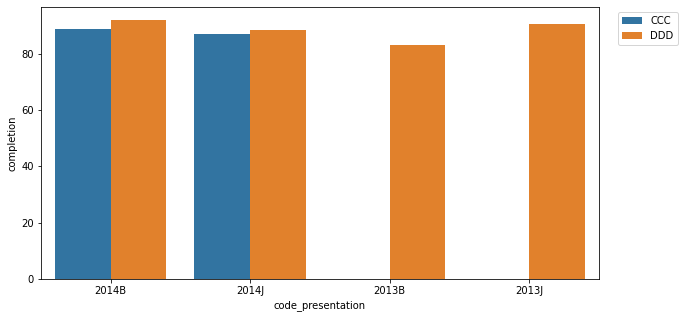

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x="code_presentation", y="completion", 
            data=data_completion,hue="code_module").legend(bbox_to_anchor=(1.15, 1), loc='upper right')

In [71]:
dissicult_module = min(data_completion.completion)

In [72]:
simple_module = max(data_completion.completion)

### Cамый сложный курс

In [73]:
data_completion.query('completion == @dissicult_module')

id_assessment code_module code_presentation  succsess_count  all_count  \
2          25340         DDD             2013B             501        602   

   completion  
2       83.22

### Cамый легкий курс

In [74]:
data_completion.query('completion == @simple_module')

id_assessment code_module code_presentation  succsess_count  all_count  \
4          25361         DDD             2014B             482        524   

   completion  
4       91.98

### Вывод: 

 * стоить отметить что завершаемость у курсов высокая, возможно потому по тем курсам, где сложно сдавать, вообще нет 
 * стоить отметить что самый сложный и самый легкий тип экзамена имеют тип CMA, но в разные года, что довольно странно



---

# Задание 3
### По каждому предмету определи средний срок сдачи экзаменов 

*под сдачей понимаем последнее ___успешное___ прохождение экзамена студентом, при этом не будем ограничивать время сдачи необходимым временем, которое требуется для теста



In [75]:
data_3 = assessments.merge(courses)
data_3 = data_3.merge(studentAssessment)
#подготовили необходимые данные

In [76]:
data_3['real_score'] = round((data_3.score * data_3.weight) / 100, 2)
data_3.head(7)

code_module code_presentation  id_assessment assessment_type  date  weight  \
0         AAA             2013J           1752             TMA  19.0    10.0   
1         AAA             2013J           1752             TMA  19.0    10.0   
2         AAA             2013J           1752             TMA  19.0    10.0   
3         AAA             2013J           1752             TMA  19.0    10.0   
4         AAA             2013J           1752             TMA  19.0    10.0   
5         AAA             2013J           1752             TMA  19.0    10.0   
6         AAA             2013J           1752             TMA  19.0    10.0   

   module_presentation_length  id_student  date_submitted  is_banked  score  \
0                         268       11391              18          0   78.0   
1                         268       28400              22          0   70.0   
2                         268       31604              17          0   72.0   
3                         268       32885              26          0   69.0   
4                         268       38053              19          0   79.0   
5                         268       45462              20          0   70.0   
6                         268       45642              18          0   72.0   

   real_score  
0         7.8  
1         7.0  
2         7.2  
3         6.9  
4         7.9  
5         7.0  
6         7.2

In [77]:
past_date_submitted = data_3.query('(assessment_type == "Exam") & (real_score > 40)') \
    .groupby(['code_module', 'code_presentation', 'id_student']) \
    .agg({'date_submitted': 'max'}).reset_index()

In [78]:
past_date_submitted.head(7)

code_module code_presentation  id_student  date_submitted
0         CCC             2014B       29764             230
1         CCC             2014B       29820             230
2         CCC             2014B       40604             234
3         CCC             2014B       42638             230
4         CCC             2014B       46605             230
5         CCC             2014B       49119             234
6         CCC             2014B       57340             230

***Интересно посмотреть на гистограмму с датами сдачи предметов***

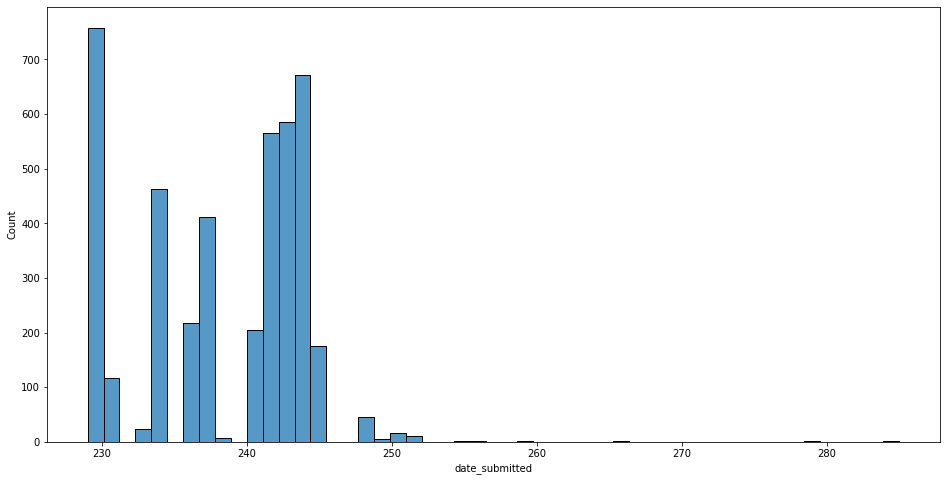

In [79]:
plt.figure(figsize=(16, 8))
sns.histplot(past_date_submitted.date_submitted)

### Средний срок сдачи экзаменов по каждому предмету

In [80]:
mean_date_submitted = past_date_submitted.groupby(['code_module', 'code_presentation']) \
    .agg({'date_submitted': 'mean'}) \
    .rename({'date_submitted': 'mean_date'}, axis=1).sort_values('code_presentation').reset_index()
mean_date_submitted.head(7)

code_module code_presentation   mean_date
0         DDD             2013B  230.167364
1         DDD             2013J  239.514019
2         CCC             2014B  231.584615
3         DDD             2014B  234.945607
4         CCC             2014J  244.408040
5         DDD             2014J  242.802424

### Посмотрим визуально на Средний срок сдачи экзаменов по каждому предмету

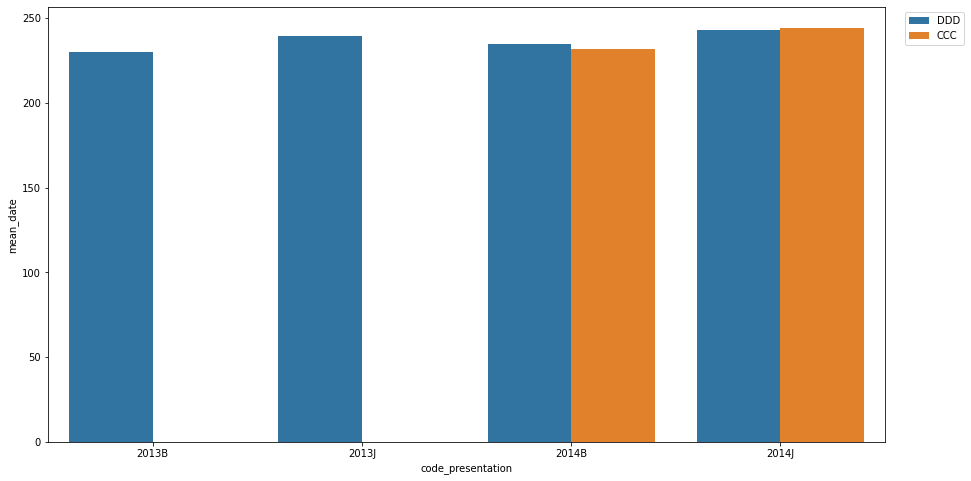

In [81]:
plt.figure(figsize=(15, 8))
sns.barplot(x="code_presentation", y="mean_date", 
            data=mean_date_submitted,hue="code_module").legend(bbox_to_anchor=(1.1, 1), loc='upper right')

### Посмотрим на требуемый срок сдачи экзаменов по каждому предмету

In [82]:
df_date = data_3.groupby(['code_module', 'code_presentation']) \
    .agg({'date': 'mean'}).sort_values('code_presentation').reset_index()
df_date.head(7)

code_module code_presentation        date
0         BBB             2013B  103.817786
1         FFF             2013B  158.669373
2         DDD             2013B  104.372988
3         AAA             2013J  109.236987
4         GGG             2013J  187.424706
5         BBB             2013J  111.751583
6         FFF             2013J  166.761638

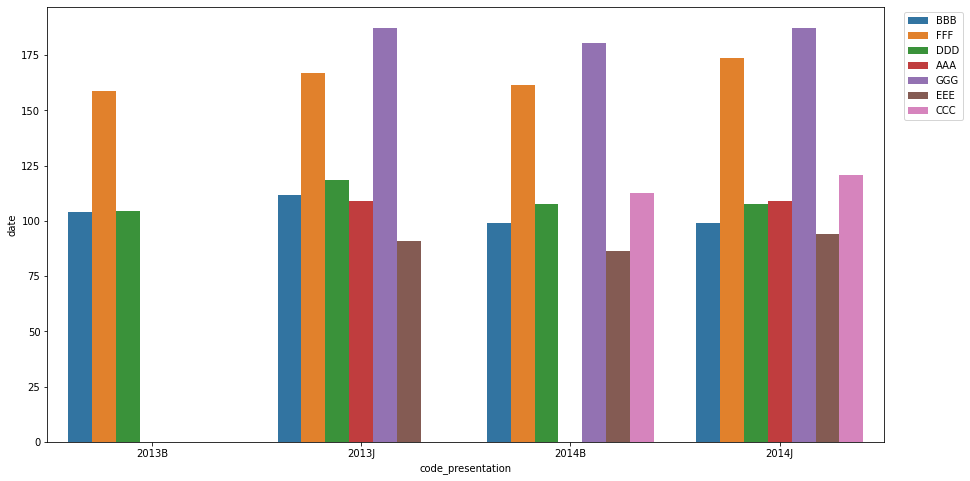

In [83]:
plt.figure(figsize=(15, 8))
sns.barplot(x="code_presentation", y="date", 
            data=df_date,hue="code_module").legend(bbox_to_anchor=(1.1, 1), loc='upper right')

### Вывод: 

 * среднее время сдачи курса превышает требуемое время
 * возможно создателям курса следует подкорректировать время сдачи, взяв за базу реальные возможности студентов

---


# Задание 4
### Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3). 





Найдем топ 3 популярных курсов, для чего сгруппируем курсы по предмету и семестру, посчитаем количество уникальных ID студентов, и после сортировки по убыванию выведем топ 3 курсов. 

In [84]:
data = pd.DataFrame(studentRegistration.groupby(['code_module', 'code_presentation'], as_index=False)['id_student'].nunique().sort_values('id_student', ascending=False))
data = data.rename({'id_student': 'students_count'}, axis=1)
top_3_pop_module = data.head(3).reset_index(drop=True)
#подготовили необходимые данные

### Топ 3 популярных курсов

In [85]:
top_3_pop_module

code_module code_presentation  students_count
0         CCC             2014J            2498
1         FFF             2014J            2365
2         BBB             2014J            2292

Результат вычисления количества ID студентов без поиска уникальных значений такой же

In [86]:
studentRegistration.groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .rename({'id_student' : 'students_count'}, axis=1) \
    .sort_values('students_count', ascending=False).head(3).reset_index(drop=True)


code_module code_presentation  students_count
0         CCC             2014J            2498
1         FFF             2014J            2365
2         BBB             2014J            2292

### Топ 3 курсов с самым большим оттоком студентов

In [87]:
studentRegistration.query('date_unregistration.isna() == False') \
    .groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .rename({'id_student' : 'outflow_count'}, axis=1) \
    .sort_values('outflow_count', ascending=False).head(3).reset_index(drop=True)


code_module code_presentation  outflow_count
0         CCC             2014J           1049
1         CCC             2014B            898
2         FFF             2014J            831

### Вывод: 

 * топ-3 популярных курсов частично пересекается с топ-3 курсов с самым большим оттоком
 * возможно эти курсы с одной стороны хороши, но с другой привлекли очень большое количество **незаинтересованных студентов**, возможно дело в рекламе курса

---

# Задание 5
### Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. 
### Выяви В период с начала 2013 по конец 2014 семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.





In [88]:
all_data_5 = assessments.merge(courses)
all_data_5 = all_data_5.merge(studentAssessment)

all_data_5 = all_data_5.merge(studentRegistration, on=['id_student', 'code_module', 'code_presentation'])
#подготовили необходимые данные

In [89]:
# Проверим правильность join
all_data_5.shape

(173912, 13)

In [90]:
all_data_5.isna().sum()

code_module                        0
code_presentation                  0
id_assessment                      0
assessment_type                    0
date                               0
weight                             0
module_presentation_length         0
id_student                         0
date_submitted                     0
is_banked                          0
score                            173
date_registration                  0
date_unregistration           160857
dtype: int64

In [91]:
all_data_5.date_registration.describe()

count    173912.000000
mean        -65.940901
std          47.048407
min        -311.000000
25%         -94.000000
50%         -53.000000
75%         -29.000000
max         167.000000
Name: date_registration, dtype: float64

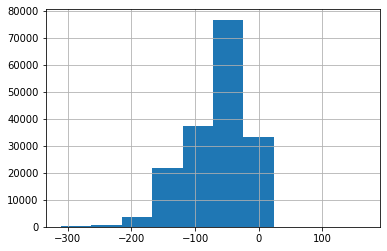

In [92]:
all_data_5.date_registration.hist()

### Разделим студентов по семестрам и посмотрим на данные

In [93]:
all_data_5.groupby('code_presentation', as_index=False).agg({'code_module': 'unique', 'id_student': 'nunique', 'score': 'mean'})

code_presentation                          code_module  id_student  \
0             2013B                      [BBB, DDD, FFF]        3803   
1             2013J       [AAA, BBB, DDD, EEE, FFF, GGG]        7098   
2             2014B       [BBB, CCC, DDD, EEE, FFF, GGG]        5748   
3             2014J  [AAA, BBB, CCC, DDD, EEE, FFF, GGG]        8613   

       score  
0  75.810931  
1  76.767261  
2  75.802904  
3  74.880515

In [94]:
cogort_data = all_data_5.groupby(['code_presentation', 'code_module']) \
    .agg({'id_student': 'nunique', 'score': 'mean'}) \
        .merge(all_data_5.groupby(['code_presentation', 'code_module']) \
               .agg({'id_student': 'count'}), on=['code_presentation', 'code_module']) \
    .rename({'id_student_x': 'uniq_student_count', 
             'id_student_y': 'all_count', 
             'score': 'mean_score'}, axis=1).reset_index()

cogort_data

code_presentation code_module  uniq_student_count  mean_score  all_count
0              2013B         BBB                1369   79.095374      11256
1              2013B         DDD                1065   69.696089      10373
2              2013B         FFF                1371   77.978409      12195
3              2013J         AAA                 365   69.431637       1633
4              2013J         BBB                1710   78.915837      14375
5              2013J         DDD                1507   69.594475       7936
6              2013J         EEE                 827   80.628948       2884
7              2013J         FFF                1874   77.139265      16240
8              2013J         GGG                 819   80.264246       5950
9              2014B         BBB                1205   78.966921       9993
10             2014B         CCC                1415   70.915553       7489
11             2014B         DDD                 944   69.325315       4542
12             2014B         EEE                 536   79.745782       1780
13             2014B         FFF                1206   76.679921      10196
14             2014B         GGG                 689   79.565884       4896
15             2014J         AAA                 340   68.598680       1516
16             2014J         BBB                1793   65.738172       7408
17             2014J         CCC                1998   74.795369      11451
18             2014J         DDD                1428   71.526934       8013
19             2014J         EEE                 935   82.462349       3229
20             2014J         FFF                1843   78.720927      16184
21             2014J         GGG                 604   79.083962       4373

В таблице cogort_data разделили студентов на семестры и курсы внутри семестров, столбец ```'uniq_student_count'``` отвечает за количество уникальных студентов, ```'mean_score'``` за среднюю оценку на предмете с учетом всех экзаменов, без учета веса, ```'all_count'```  общее количество попыток сдать студентами

---

### Напишем программу, которая делит весь датафрейм на семестры 

In [95]:
data_5 = assessments.merge(courses).merge(studentAssessment)

data_5 = data_5.merge(studentRegistration, on=['id_student', 'code_module', 'code_presentation'])


Преобразуем данные, учтем вес теста, объединим тесты по типу теста

In [96]:
data_5['real_score'] = round((data_5.score * data_5.weight / 100), 2)
# real_score это оценка с учетом ее веса

In [97]:
presentation = data_5.code_presentation.unique().tolist()
big_data = {}
for i in presentation:
     big_data[i] = pd.DataFrame(data_5.query('code_presentation == @i'))

Теперь по ключу мы можем обращаться к отдельным датафреймам

In [98]:
big_data['2013B'].head(7)

code_module code_presentation  id_assessment assessment_type   date  \
3149         BBB             2013B          14991             CMA   54.0   
3150         BBB             2013B          14992             CMA   89.0   
3151         BBB             2013B          14993             CMA  124.0   
3152         BBB             2013B          14994             CMA  159.0   
3153         BBB             2013B          14995             CMA  187.0   
3154         BBB             2013B          14984             TMA   19.0   
3155         BBB             2013B          14985             TMA   47.0   

      weight  module_presentation_length  id_student  date_submitted  \
3149     1.0                         240     1008675              60   
3150     1.0                         240     1008675              95   
3151     1.0                         240     1008675             126   
3152     1.0                         240     1008675             164   
3153     1.0                         240     1008675             189   
3154     5.0                         240     1008675              19   
3155    18.0                         240     1008675              46   

      is_banked  score  date_registration  date_unregistration  real_score  
3149          0   40.0              -48.0                  NaN         0.4  
3150          0  100.0              -48.0                  NaN         1.0  
3151          0  100.0              -48.0                  NaN         1.0  
3152          0  100.0              -48.0                  NaN         1.0  
3153          0  100.0              -48.0                  NaN         1.0  
3154          0   70.0              -48.0                  NaN         3.5  
3155          0   60.0              -48.0                  NaN        10.8

### Теперь для каждого элемента кортежа, т е для каждого семестра найдем величину завершаемости 
* завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [99]:
data_2013B = big_data['2013B']
data_2013J = big_data['2013J']
data_2014B = big_data['2014B']
data_2014J = big_data['2014J']

Найдем количество сданных экзаменов для каждого семестра

In [100]:
completion_2013В = round((data_2013B.query('(real_score >= 40) & (date_submitted <= date) | (is_banked == 1)') \
                    .real_score.count()) / (data_2013B.real_score.count())*100, 2)
completion_2013В

1.77

In [101]:
completion_2013J = round((data_2013J.query('(assessment_type == "Exam") & ((real_score >= 40) & (date_submitted <= date) | (is_banked == 1))') \
                    .real_score.count()) / (data_2013J.query('assessment_type == "Exam"').real_score.count())*100, 2)
completion_2013J

90.7

In [102]:
completion_2014В = round((data_2014B.query('(assessment_type == "Exam") & ((real_score >= 40) & (date_submitted <= date) | (is_banked == 1))') \
                    .real_score.count()) / (data_2014B.query('assessment_type == "Exam"').real_score.count())*100, 2)
completion_2014В

90.01

In [103]:
completion_2014J = round((data_2014J.query('(assessment_type == "Exam") & ((real_score >= 40) & (date_submitted <= date) | (is_banked == 1))') \
                    .real_score.count()) / (data_2014J.query('assessment_type == "Exam"').real_score.count())*100, 2)
completion_2014J

87.77

### Для каждого семестра найдем насколько долго сдавали тесты

* для этого введем новую переменную, которая будет равна ```df.date - df.date_submitted```, это как бы запас дней, который остается до дедлайна, чем она больше, тем раньше студенты заканчивают сдачу курса, если она отрицательна, значит студенты сдали экзамен позже срока сдачи

In [104]:
(data_2013B.date - data_2013B.date_submitted).mean()

12.435844370860927

In [105]:
(data_2013B.date - data_2013B.date_submitted).std()

42.682976992209724

In [106]:
(data_2013J.date - data_2013J.date_submitted).mean()

19.094985515524908

In [107]:
(data_2013J.date - data_2013J.date_submitted).std()

47.55636449922306

In [108]:
(data_2014B.date - data_2014B.date_submitted).mean()

14.617827025915261

In [109]:
(data_2014B.date - data_2014B.date_submitted).std()

41.917990563287624

In [110]:
(data_2014J.date - data_2014J.date_submitted).mean()

18.74678958868402

In [111]:
(data_2014J.date - data_2014J.date_submitted).std()

47.78039080468005

### Визуализируем данные как увеличивается число сдающих тесты в каждом семестре с течением времени

Для этого:
 * предварительно обработаем каждый семестр, сделаем ограничение срока сдачи,  т к в данных присутствуют единичные выбросы, исключим еще людей с перезачетом, т к у них дата сдачи не отражает реальность (-1)
 * так же применим оконную функцию чтоб сделать накопительную сумму

In [112]:
data_5_series_2013B = data_2013B.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .query('date_submitted > 0 & date_submitted < 270').id_student.expanding().sum()
data_5_series_2013B = pd.DataFrame(data_5_series_2013B).rename({'id_student': 'expanding_sum'}, axis=1)
data_5_series_2013B = data_5_series_2013B.reset_index()

In [113]:
df_5_2013B = data_2013B.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}).rename({'id_student': 'count_students'}, axis=1) \
    .query('date_submitted > 0 & date_submitted < 270').reset_index()

In [114]:
data_5_series_2013J = data_2013J.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .query('date_submitted > 0 & date_submitted < 270').id_student.expanding().sum()
data_5_series_2013J = pd.DataFrame(data_5_series_2013J).rename({'id_student': 'expanding_sum'}, axis=1)
data_5_series_2013J = data_5_series_2013J.reset_index()

In [115]:
df_5_2013J = data_2013J.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}).rename({'id_student': 'count_students'}, axis=1) \
    .query('date_submitted > 0 & date_submitted < 270').reset_index()

In [116]:
data_5_series_2014B = data_2014B.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .query('date_submitted > 0 & date_submitted < 270').id_student.expanding().sum()
data_5_series_2014B = pd.DataFrame(data_5_series_2014B).rename({'id_student': 'expanding_sum'}, axis=1)
data_5_series_2014B = data_5_series_2014B.reset_index()

In [117]:
df_5_2014B = data_2014B.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}).rename({'id_student': 'count_students'}, axis=1) \
    .query('date_submitted > 0 & date_submitted < 270').reset_index()

In [118]:
data_5_series_2014J = data_2014J.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}) \
    .query('date_submitted > 0 & date_submitted < 270').id_student.expanding().sum()
data_5_series_2014J = pd.DataFrame(data_5_series_2014J).rename({'id_student': 'expanding_sum'}, axis=1)
data_5_series_2014J = data_5_series_2014J.reset_index()

In [119]:
df_5_2014J = data_2014J.query('is_banked == 0').groupby(['code_presentation', 'date_submitted'], as_index=False) \
    .agg({'id_student': 'count'}).rename({'id_student': 'count_students'}, axis=1) \
    .query('date_submitted > 0 & date_submitted < 270').reset_index()

In [120]:
df_2013B = df_5_2013B.merge(data_5_series_2013B)
df_2013J = df_5_2013J.merge(data_5_series_2013J)
df_2014B = df_5_2014B.merge(data_5_series_2014B)
df_2014J = df_5_2014J.merge(data_5_series_2014J)

In [121]:
df = pd.concat([df_2013B, df_2013J, df_2014B, df_2014J])

In [122]:
fig = px.line(df, x="date_submitted", y="expanding_sum", color='code_presentation', 
              hover_name='code_presentation')

fig.show()

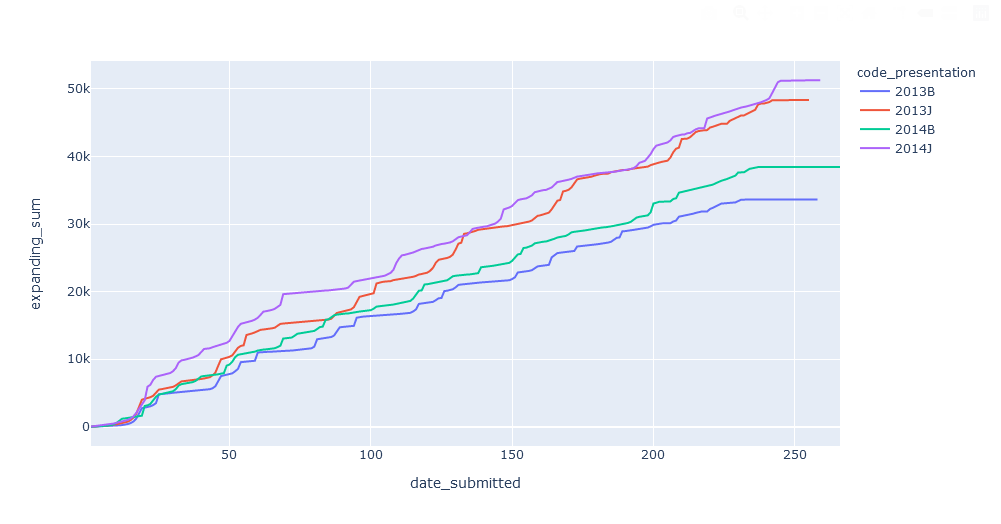

### Выводы:
 * семестр с самой низкой завершаемость 2013В, возможно это связано с тем, что это первый семестр, люди не рассчитали свои силы
 * в этом же семестре дольше всего сдавались экзамены, т е запаса времени в среднем оставалось меньше, хотя по этому показателю семестр не ушел в особый отрыв от других, при этом стандартное отклонение плюс минус везде одинаково 
 * рост числа сдащих экзамен не скачкообразный, скорее всего нет каких то внешних факторов, влияющих на желание студента сдать экзамен, т е все сдают по мере освоения материала

---

# Задание 6
### Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию
В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. 
### Подробно опиши, как ты создавал кластеры
### Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров


Сохраним эту картинку как подсказку



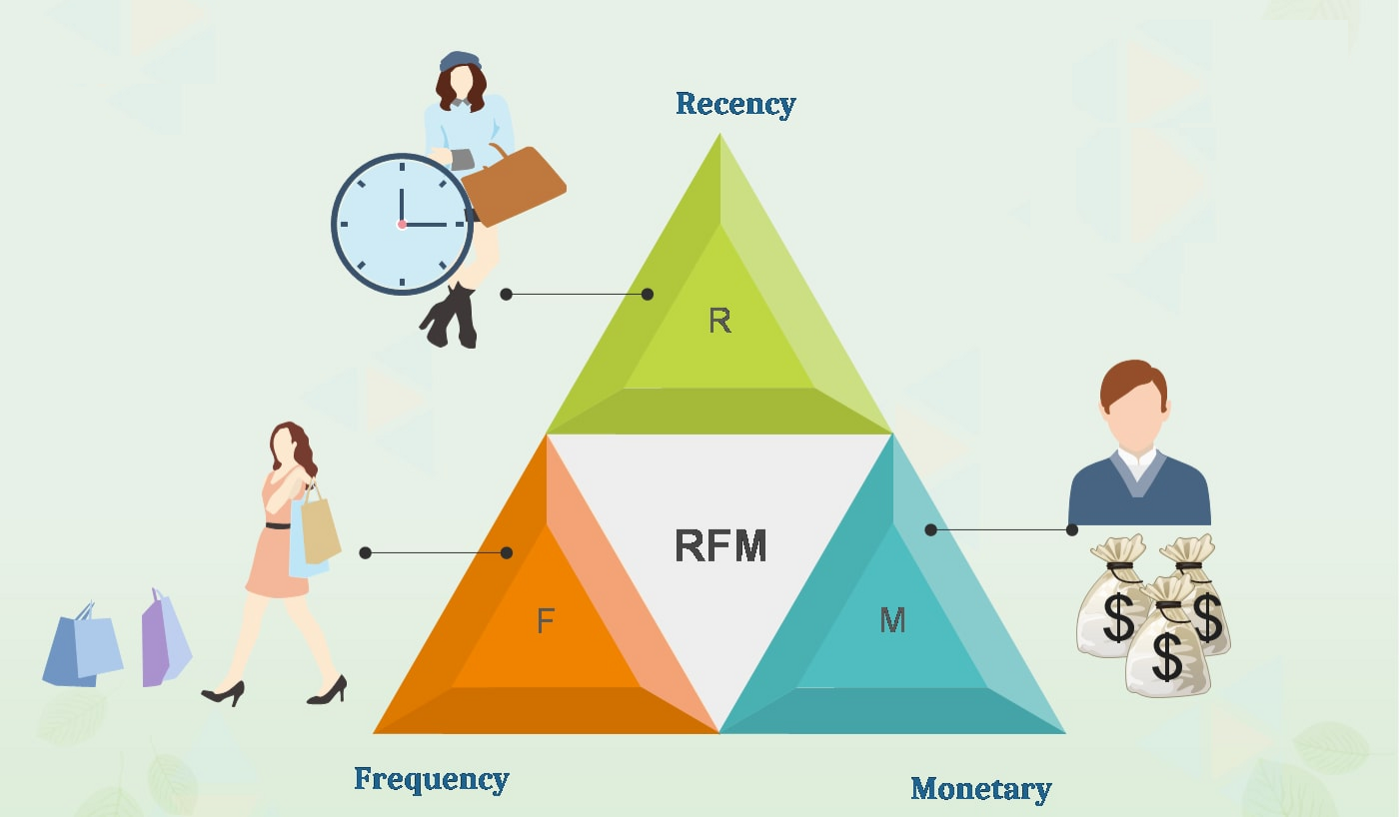

Определимся что взять в качестве метрик RFM конкретно в нашем случае

***R - recency - среднее время сдачи одного теста*** 

(тк мы не знаем относительное расположение курсов внутри года, то смотреть по датам регистрации (которые заданы от начала курса) кажется не очень  логичным, принимает среднее время сдачи экзамена, в днях от начала курса

***F - frequency - завершаемость курсов*** 

(для каждого студента кол-во успешных тестов / все попытки)

***M - monetary - реальные баллы на тестах***

(реальные баллы = баллы * вес теста)

### Внутри каждой метрики нужно принять интервалы, для этого необходимо посмотреть описательную статистику метрики

In [123]:
data_6 = studentAssessment.merge(assessments)
data_6.score = data_6.score.fillna(0) #подготовили необходимые данные

In [124]:
data_6.isna().sum()

id_assessment        0
id_student           0
date_submitted       0
is_banked            0
score                0
code_module          0
code_presentation    0
assessment_type      0
date                 0
weight               0
dtype: int64

### Подготовим данные со средним временем сдачи каждого типа теста и с его стандартным отклонением
### Делю по типам теста, т к по ним большая разница в сроках сдачи, а при группировке по предметам или по семестрам, разница внутри типа теста несущественная

In [125]:
df_R = (pd.DataFrame(data_6.query('date_submitted > 0').groupby(['assessment_type'], as_index=False) \
                    .date_submitted.mean()).rename({'date_submitted': 'mean_date_submitted'}, axis=1)) \
    .merge(pd.DataFrame(data_6.query('date_submitted > 0').groupby(['assessment_type'], as_index=False) \
                    .date_submitted.std()).rename({'date_submitted': 'std_date_submitted'}, axis=1))
df_R

assessment_type  mean_date_submitted  std_date_submitted
0             CMA           140.075714           70.606148
1            Exam           238.483565            5.717577
2             TMA            95.008003           60.378132

In [126]:
data_6[data_6.assessment_type == 'TMA'].date_submitted.describe(percentiles=[.05, .20, .40, .50, .60, .80, .90, .99])

count    98426.000000
mean        93.583037
std         61.044593
min        -11.000000
5%          16.000000
20%         31.000000
40%         59.000000
50%         89.000000
60%        113.000000
80%        158.000000
90%        182.000000
99%        209.000000
max        274.000000
Name: date_submitted, dtype: float64

#### Выберу сегментацию на 3 группы, границы для метрики ```recency``` я выберу примерно так:

* для типа теста ```СМА``` границы будут для первой группы до 120 дня, для второй группы от 121 дней до 220, для третьей группы  более 220 дней;
* для типа теста ```Exam``` границы будут для первой группы до 237 дней, для второй группы от 238 дней до 245, для третьей группы  более 245 дней;
* для типа теста ```TMA``` границы будут для первой группы до 60 дней, для второй группы от 61 дней до 170, для третьей группы  более 170 дней

In [127]:
def recency_CMA(x):
    res = []
    x = x.tolist()
    for i in x:
        if i <= 120:
            res.append(1)
        elif (i > 120) & (i <= 220):
            res.append(2)
        else:
            res.append(3)
    return pd.Series(res)

In [128]:
def recency_Exam(x):
    res = []
    x = x.tolist()
    for i in x:
        if i <= 237:
            res.append(1)
        elif (i > 237) & (i <= 245):
            res.append(2)
        else:
            res.append(3)
    return pd.Series(res)

In [129]:
def recency_TMA(x):
    res = []
    x = x.tolist()
    for i in x:
        if i <= 60:
            res.append(1)
        elif (i > 60) & (i <= 170):
            res.append(2)
        else:
            res.append(3)
    return pd.Series(res)

In [130]:
def recency(df):
    import pandas as pd
    
    df_CMA = df.query('assessment_type == "CMA"').reset_index()
    df_CMA['recency'] = recency_CMA(df_CMA['date_submitted'])
    
    df_Exam = df.query('assessment_type == "Exam"').reset_index()
    df_Exam['recency'] = recency_Exam(df_Exam['date_submitted'])
    
    df_TMA = df.query('assessment_type == "TMA"').reset_index()
    df_TMA['recency'] = recency_TMA(df_TMA['date_submitted'])
    
    df = pd.concat(df_CMA, df_Exam, df_TMA)
    return df
    

In [131]:
df_CMA = data_6.query('assessment_type == "CMA"').reset_index()
df_CMA['recency'] = recency_CMA(df_CMA['date_submitted'])


df_Exam = data_6.query('assessment_type == "Exam"').reset_index()
df_Exam['recency'] = recency_Exam(df_Exam['date_submitted'])
    
df_TMA = data_6.query('assessment_type == "TMA"').reset_index()
df_TMA['recency'] = recency_TMA(df_TMA['date_submitted'])

In [132]:
data_6_R = pd.concat([df_CMA, df_Exam, df_TMA])

In [133]:
data_6_R.id_student.nunique()

23369

Так как в данных у нас люди получились в разных группах ```recency``` для разных экзаменов, поэтому в качестве окончательного распределения, мы возьмем ```min``` (т.е. по умолчанию лучшую группу)

In [134]:
data_R = data_6_R.groupby('id_student', as_index=False) \
    .agg({'recency': 'min'})

In [135]:
data_R.shape[0]

23369

### Подготовим данные с завершаемостью курса
### Посмотрим по людям, какие варианты величин завершаемости есть

Найдем количество сданных экзаменов для каждого студента

Опять же добавим реальную оценку

In [136]:
data_6['real_score'] = round((data_6.score * data_6.weight) / 100, 2)

Просуммируем оценки внутри одного типа экзамена, т к в сумме вес экзамена внутри типа дает 100%, получается оценки должны суммироваться

In [137]:
data_6_real_score = data_6.groupby(['id_student', 'assessment_type', 'code_module', 'code_presentation'], as_index=False) \
    .agg({'real_score': 'sum'}) 

Смотрим сколько раз вообще человек пробовал сдавать экзамен

In [138]:
data_trying = data_6_real_score.groupby(['id_student'], as_index=False) \
    .agg({'real_score': 'count'}).rename({'real_score':'all_trying'}, axis=1)

Сколько раз у него получалось без учета времени сдачи

In [139]:
data_success = data_6_real_score.query('real_score >= 40').groupby(['id_student'], as_index=False) \
    .agg({'real_score': 'count'}).rename({'real_score':'success'}, axis=1)

In [140]:
data_trying.shape[0]

23369

In [141]:
data_success.shape[0]

15088

Теперь найдем завершаемость как отношение числа удачных попыток к числу всех попыток

In [142]:
data_completion = data_trying.merge(data_success, on='id_student', how='left').fillna(0)


In [143]:
data_completion['completion'] = round((data_completion.success / data_completion.all_trying), 2)

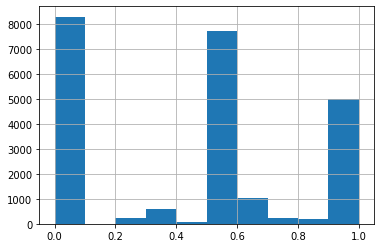

In [144]:
data_completion['completion'].hist()

#### Выберу сегментацию на 3 группы, границы для метрики ```frequency``` я выберу примерно так:

* **третья группа** это завершаемость 0
* **вторая группа** это все значения больше 0, но меньше 1
* **первая группа** это те молодцы, кто сколько берет, столько и заканчивает (нужно помнить что мы никак не ограничивали количество попыток, т е человек попробавший сдать 1 раз  и успешно сдавший для нас молодец, а вот человек, кто сдал 2 экзамена из 3х уже не такой молодец в нашей сегментации

Группы расположила в порядке возрастания успехов)

In [145]:
def frequency(x):
    res = []
    x = x.tolist()
    for i in x:
        if i == 0:
            res.append(3)
        elif (i > 0) & (i < 1):
            res.append(2)
        else:
            res.append(1)
    return pd.Series(res)

In [146]:
data_completion['frequency'] = frequency(data_completion.completion)

In [147]:
data_F = data_completion[['id_student', 'frequency']]

### Подготовим данные со средним количеством баллов на тесте
### Посмотрим описательную статистику этой величины

Так как мы учли реальную оценку, которая учитывает вес, поэтому мы не будем группировать данные по типу теста внутри id_student

In [148]:
data_mean_score = data_6.groupby(['id_student'], as_index=False) \
    .agg({'real_score': 'mean'}).rename({'real_score': 'mean_score'}, axis=1)

Теперь нам нужно понять на какие сегменты нам делить

В этой задаче еще учтем исходные данные в задании, где оговаривалось что за сданное мы принимаем 40 баллов

In [149]:
data_mean_score.mean_score.describe(percentiles=[.05, .20, .40, .50, .60, .80, .90, .95, .99])

count    23369.000000
mean         9.220068
std          6.589614
min          0.000000
5%           0.000000
20%          4.364205
40%          6.541667
50%          7.250000
60%          8.375000
80%         15.260000
90%         19.880000
95%         22.149077
99%         25.093143
max         84.000000
Name: mean_score, dtype: float64

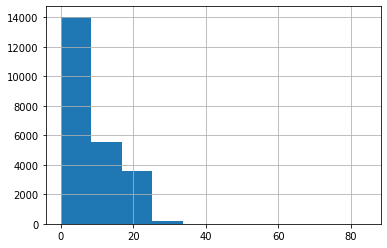

In [150]:
data_mean_score.mean_score.hist()

#### Выберу сегментацию на 3 группы, границы для метрики ```monetary``` я выберу примерно так:

* **третья группа** это средний балл не выше 7
* **вторая группа** это все значения среднего балла больше 7, но меньше 40
* **первая группа** это опять молодцы, которые набрали в среднем не меньше 40 баллов

In [151]:
def monetary(x):
    res = []
    x = x.tolist()
    for i in x:
        if i <= 7:
            res.append(3)
        elif (i > 7) & (i < 40):
            res.append(2)
        else:
            res.append(1)
    return pd.Series(res)

In [152]:
data_mean_score['monetary'] = monetary(data_mean_score.mean_score)

In [153]:
#Проверка себя
data_mean_score.monetary.unique()

array([2, 3, 1])

In [154]:
data_M = data_mean_score[['id_student', 'monetary']]

In [155]:
data_M.shape[0]

23369

In [156]:
data_total_6 = data_R.merge(data_F, on='id_student').merge(data_M, on='id_student')

In [157]:
data_total_6['RFM'] = data_total_6.recency.map(str) + data_total_6.frequency.map(str) + data_total_6.monetary.map(str)

### Теперь можем взять нашу изначальную таблицу и добавить туда наши показатели RFM

In [158]:
data_RFM = data_6.merge(data_total_6, on='id_student', how='left')

In [159]:
#Проверяем все ли на месте и нет ли лишнего
data_RFM.shape[0]

173912

### Давайте посмотрим на наших 'лучших людей'

In [160]:
data_RFM[data_RFM.RFM == '111']

id_assessment  id_student  date_submitted  is_banked  score  \
87497          25361      363122             234          0   82.0   
87758          25361      623008             236          0   60.0   

      code_module code_presentation assessment_type   date  weight  \
87497         DDD             2014B            Exam  241.0   100.0   
87758         DDD             2014B            Exam  241.0   100.0   

       real_score  recency  frequency  monetary  RFM  
87497        82.0        1          1         1  111  
87758        60.0        1          1         1  111

Кажется всего два человека вошли в нашу группу "лучших людей"

### Посмотрим вообще распределение людей по сегментам

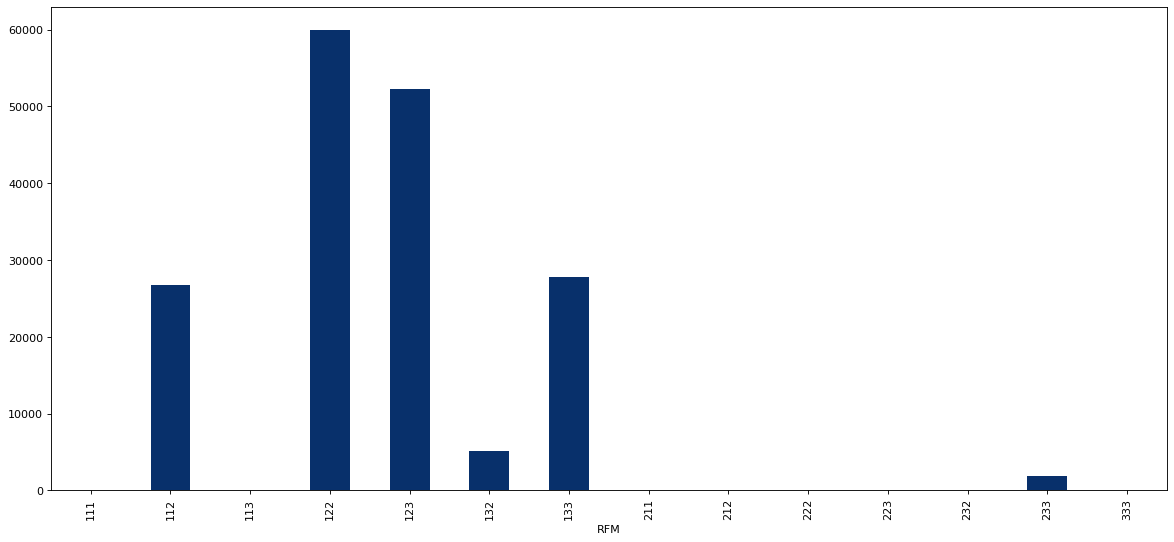

In [161]:
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k') 
data_RFM.groupby('RFM').agg('id_student').count().plot(kind='bar', colormap='Blues_r')
plt.show()

### Посмотрим среднюю оценку по сегментам

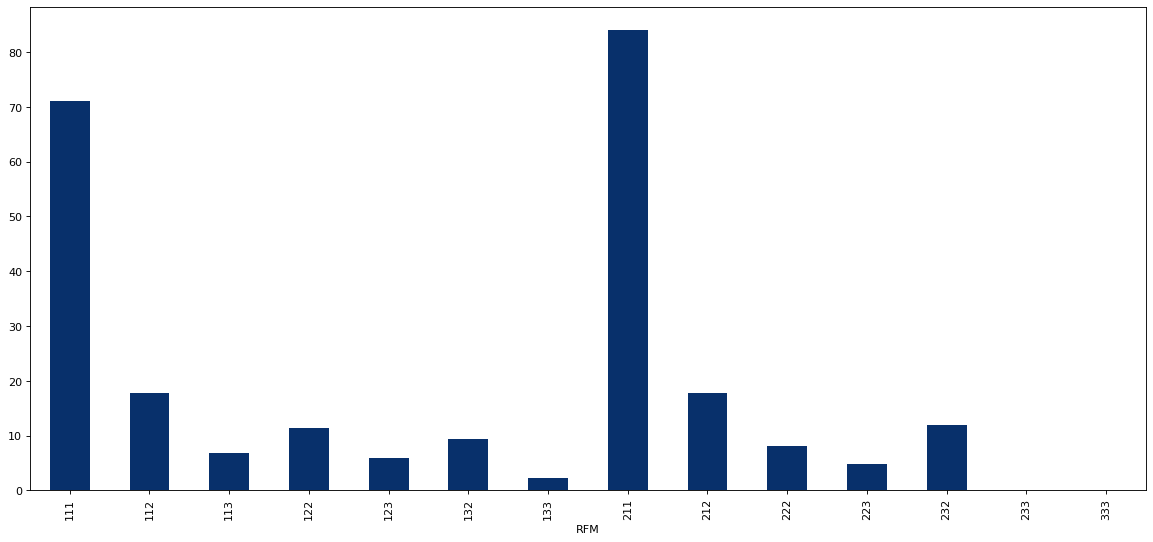

In [162]:
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k') 
data_RFM.groupby('RFM').agg('real_score').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

### Посмотрим на завершаемость курсов по сегментам

In [163]:
data_RFM_c = data_RFM.merge(data_completion, on=['id_student', 'frequency'], how='left')

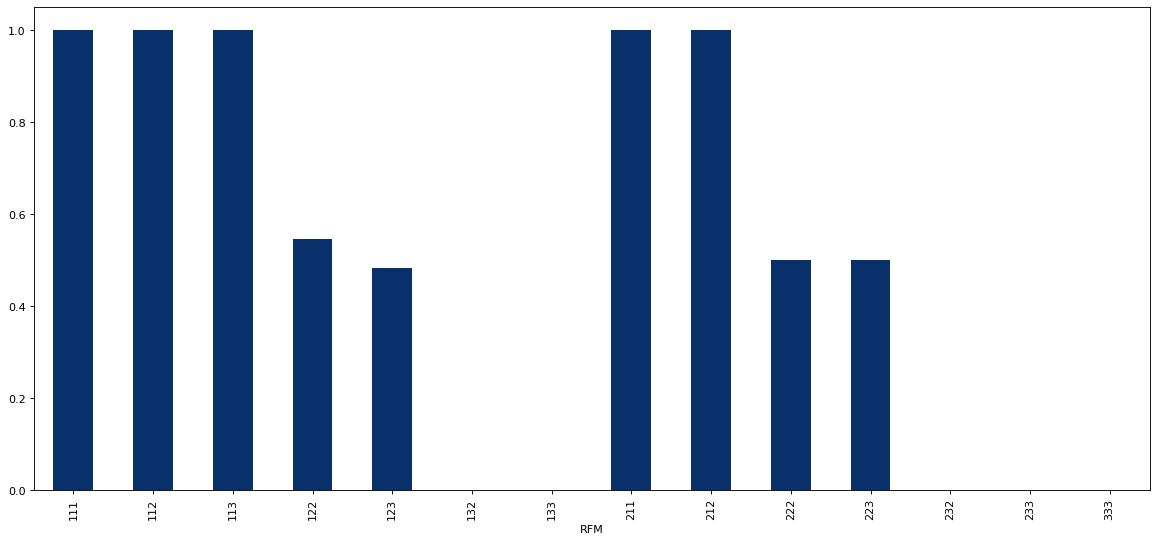

In [164]:
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k') 
data_RFM_c.groupby('RFM').agg('completion').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

## Выводы:

Еще раз напомним границы сегментов:
* R - среднее время сдачи одного теста 
                           (группа 1 -  (СМА: меньше 120 дней, Exam: меньше 237 дней, TMA меньше 60 дней)
                            группа 2 -  (СМА: от 120 до 220 дней, Exam: от 237 дней до 245, TMA от 60 до 170 дней)
                            группа 3 -  (СМА: более 220 дней, Exam: более 245 дней, TMA более 170 дней)
                                    
                                    
* F - завершаемость курса 
                          (группа 1 - у кого завершаемость 1
                           группа 2 - завершаемость от 0 до 1 невключительно
                           группа 3 - завершаемость 0)
                           
* M - среднее количество баллов с учетом веса теста 
                          (группа 1 - не меньше 40
                           группа 2 - от 7 до 40 баллов
                           группа 3 - не выше 7 баллов)


 - ***больше всего людей в сегменте 122 (почти 60 тыс. человек), т.е. там где у студентов минимальные средние время сдачи теста, завершаемость от 0 до 1, т е люди, которые пробуют несколько экзаменов и часть из них успешно сдают, и средний балл у них от 7 до 40;***
 
 
 - ***меньше всего студентов в группе 211 (всего 1 человек), где экзамен сдавали по времени средне, но при этом завершаемость 1, и среднее количество баллов не менее 40;***
 
 
 - ***группа самых лучших (111) состоит всего из двух человек;***
 
 
 - ***нет групп 121, 131, 213, 221, 231, ну и логично кто по recency имеет 3 сетор, по другим показателем не имеет 1 или 2 в других сектарах;***
 
 
 - ***и те 12 человек, которые сейчас в секторе 333, скорее всего уйдут из наших курсов***

### RFM анализ может помочь выбрать таргетированное воздействие и таким образом удержать пользователей

## Вывод общий:
- Мне удалось выгрузить и изучить данные. В принципе, описание данных, колонки все логичны, и нет лишней информации, по данным примерно понятна хронология курсов, поведение студентов, логика оценки курсов.
- Многие моменты в заданиях требовали самостоятельного принятия решений, что считаю даже плюсом, так как прихоится больше думать и меньше выполнять автоматизированные действия, но конечно же есть какие то спорные моменты, которые мне не до конца понятны. 
- Исследовала данные на наличие аномалий и в случае необходимости корректрировала их, дополняла данные.
- Сделала выводы по каждому пункту задания
